In [53]:
import requests
import os
import urllib.request
import pandas as pd
import seaborn as sns

In [54]:
#original github of 16S and Shotgun https://github.com/wbb121/IBD-data-analysis

In [55]:
#Install 
!pip install umap-learn magic-impute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import umap

In [57]:
url_genus_table_16S = 'https://raw.githubusercontent.com/wbb121/IBD-data-analysis/main/amplicon_tables/genus_table_rarefaction_100k.csv'

url_genus_table_shotgun = 'https://raw.githubusercontent.com/wbb121/IBD-data-analysis/main/shotgun_tables/shotgun_abundance_L6.txt'

metadata= 'https://raw.githubusercontent.com/wbb121/IBD-data-analysis/main/metadata.csv'

In [58]:
urllib.request.urlretrieve(url_genus_table_16S, 'table_16S.csv')
urllib.request.urlretrieve(url_genus_table_shotgun, 'table_shotgun.csv')
urllib.request.urlretrieve(metadata, 'metadata.csv')
os.listdir()
#!cd /content

['.config',
 '__pycache__',
 'metadata.csv',
 'mb_PHENIX.py',
 'table_16S.csv',
 'table_shotgun.csv',
 'sample_data']

In [59]:
metadata = pd.read_csv('/content/metadata.csv');metadata= metadata.iloc[:,1:]
table_16S = pd.read_csv('/content/table_16S.csv').set_index('Unnamed: 0').T
table_shotgun = pd.read_csv('/content/table_shotgun.csv',skiprows=1,sep='\t').T

#shared from the same sample based on the metadata among 16S and and shotgun
table_16S=table_16S.reset_index()
table_16S_ok= table_16S[table_16S['index'].isin(metadata['SampleID'])]
table_16S_ok.columns = table_16S_ok.columns.to_series().apply(lambda x: x.split(';')[5] if len(x.split(';')) > 4 else x)
table_16S_ok= table_16S_ok.set_index('index')

table_shotgun=table_shotgun.reset_index()
table_shotgun['index'] = table_shotgun['index'].str.replace('-', '.')
table_shotgun_ok= table_shotgun[table_shotgun['index'].isin(metadata['shotgun.SampleID'])]#['shotgun.SampleID'])]
table_shotgun_ok.columns = table_shotgun_ok.columns.to_series().apply(lambda x: x.split(';')[-1])
table_shotgun_ok = table_shotgun_ok.set_index('index')

#keep bouth matrices with the same id
table_16S_ok['index']= metadata.set_index('SampleID')['shotgun.SampleID']
table_16S_ok=table_16S_ok.set_index('index')

In [60]:
import numpy as np
comunes = np.intersect1d(table_16S_ok.columns, table_shotgun_ok.columns)

In [61]:
shotgun = table_shotgun_ok[comunes]
T_16S = table_16S_ok [comunes]

In [62]:
shotgun_labels = pd.DataFrame()
shotgun_labels['SampleType'] = metadata.set_index('shotgun.SampleID')['SampleType']

In [63]:
T_16S_labels = pd.DataFrame()
T_16S_labels['SampleType'] = metadata.set_index('shotgun.SampleID')['SampleType']

#Correlation analysis of by healty sample among technologies 16s vs shotgun with non-imputation

In [64]:
shotgun_Healthy = shotgun[shotgun_labels['SampleType'] == 'Healthy']

In [65]:
T_16S_Healthy = T_16S[T_16S_labels['SampleType'] == 'Healthy']

<ipython-input-65-1aa1a7f19f6e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  T_16S_Healthy = T_16S[T_16S_labels['SampleType'] == 'Healthy']


In [66]:
""""
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12*2, 10*2)) # set the figure size
sns.heatmap(T_16S_Healthy.corr(), cmap='coolwarm', ax=ax)
"""

'"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\nfig, ax = plt.subplots(figsize=(12*2, 10*2)) # set the figure size\nsns.heatmap(T_16S_Healthy.corr(), cmap=\'coolwarm\', ax=ax)\n'

In [67]:
"""
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12*2, 10*2)) # set the figure size
sns.heatmap(shotgun_Healthy.corr(), cmap='coolwarm', ax=ax)
"""

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\nfig, ax = plt.subplots(figsize=(12*2, 10*2)) # set the figure size\nsns.heatmap(shotgun_Healthy.corr(), cmap='coolwarm', ax=ax)\n"

In [68]:
T_16S_Healthy

Unnamed: 0,g__Acidaminococcus,g__Acinetobacter,g__Actinobacillus,g__Actinomyces,g__Actinotignum,g__Adlercreutzia,g__Aeromonas,g__Aggregatibacter,g__Akkermansia,g__Alistipes,...,g__Slackia,g__Sneathia,g__Sphingomonas,g__Staphylococcus,g__Stenotrophomonas,g__Streptococcus,g__Thermus,g__Turicibacter,g__Veillonella,g__Weissella
index,,,,,,,,,,,,,,,,,,,,,
SM030818.1,0.0,0.00,0.00,9.57,0.0,0.00,0.00,0.0,8.61,2839.52,...,0.00,0.0,0.0,0.00,0.0,121.15,0.0,0.00,5.74,0.0
SM071219.89,0.0,0.00,0.00,13.00,0.0,0.00,0.00,0.0,897.00,11736.00,...,0.00,0.0,0.0,0.00,0.0,23.00,0.0,8.00,78.00,0.0
SM071219.92,304.0,0.00,0.00,9.00,0.0,0.00,0.00,0.0,18.00,2846.00,...,0.00,0.0,0.0,0.00,0.0,363.00,0.0,27.00,34.00,0.0
SM071219.95,0.0,0.00,33.00,0.00,0.0,0.00,0.00,0.0,86.00,3594.00,...,0.00,0.0,0.0,0.00,0.0,573.00,0.0,127.00,250.00,0.0
SM111418.113,2489.0,0.00,0.00,4.00,0.0,0.00,0.00,0.0,119.00,4225.00,...,0.00,0.0,0.0,0.00,0.0,322.00,0.0,24.00,16.00,0.0
SM030818.148,0.0,1.65,0.00,47.64,0.0,410.76,0.00,0.0,400.97,426.59,...,33.53,0.0,0.0,0.00,0.0,1488.21,0.0,18.55,6.20,0.0
SM030818.134,0.0,17.10,13.67,8.34,0.0,0.00,19.57,0.0,12.27,7.36,...,0.00,0.0,0.0,27.60,5.1,425.22,0.0,8.94,80.47,0.0
SM030818.135,0.0,2.00,0.00,18.00,0.0,145.00,0.00,0.0,0.00,1428.00,...,0.00,0.0,3.0,0.00,0.0,116.00,0.0,123.00,20.00,0.0
SM030818.136,0.0,0.00,0.00,43.00,0.0,0.00,0.00,0.0,155.00,117.00,...,0.00,0.0,0.0,5.00,0.0,254.00,0.0,4.00,0.00,0.0


In [69]:
import numpy as np
import seaborn as sns

# create two dataframes
df1 = T_16S_Healthy.sort_index()
df2 = shotgun_Healthy.sort_index()

# calculate the correlation matrix between the two dataframes
corr_mat = np.corrcoef(df1.values.flatten(), df2.values.flatten()).reshape((2,2))
corr_mat


array([[1.       , 0.6368689],
       [0.6368689, 1.       ]])

#**Microbiome data**

In [70]:
url_mbphenix = 'https://raw.githubusercontent.com/resendislab/mb-PHENIX/main/CODE/mb-phenix%20code/mb_PHENIX.py'

In [71]:
urllib.request.urlretrieve(url_mbphenix, 'mb_PHENIX.py')
os.listdir()
!cd /content

#**Import mb-PHENIX**

In [72]:
from mb_PHENIX import mbPHENIX

#**imputation mb-PHENIX in a surpervised manner**
this is just like sc-phenix https://doi.org/10.1101/2022.06.09.495525

In [79]:
umap_op = umap.UMAP(n_components=10, verbose=True,metric='euclidean',n_epochs=500,min_dist=0.1,
                    n_neighbors=30,random_state=1,target_weight=0.5)
data_umap_vis_super = umap_op.fit_transform(T_16S,T_16S_labels['SampleType'].replace( {'Healthy': 0, 'UC':1}))

UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=1, verbose=True)
Sun Apr 16 21:23:42 2023 Construct fuzzy simplicial set
Sun Apr 16 21:23:42 2023 Finding Nearest Neighbors
Sun Apr 16 21:23:42 2023 Finished Nearest Neighbor Search
Sun Apr 16 21:23:42 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Apr 16 21:23:45 2023 Finished embedding


In [80]:
imputed_ALL =mbPHENIX(T_16S, data_umap_vis_super, t=3,decay=15,metric='euclidean',knn=3)

calculando distancias
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Sun Apr 16 21:23:45 2023


In [81]:
import numpy as np
import seaborn as sns



# create two dataframes
df1 = imputed_ALL[T_16S_labels['SampleType'] == 'Healthy'].sort_index()
df2 =  shotgun_Healthy.sort_index()

# calculate the correlation matrix between the two dataframes
corr_mat = np.corrcoef(df1.values.flatten(), df2.values.flatten()).reshape((2,2))
corr_mat

<ipython-input-81-2ee4ff2e4f8d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = imputed_ALL[T_16S_labels['SampleType'] == 'Healthy'].sort_index()


array([[1.        , 0.52525039],
       [0.52525039, 1.        ]])

<Axes: xlabel='Unnamed: 0', ylabel='Unnamed: 0'>

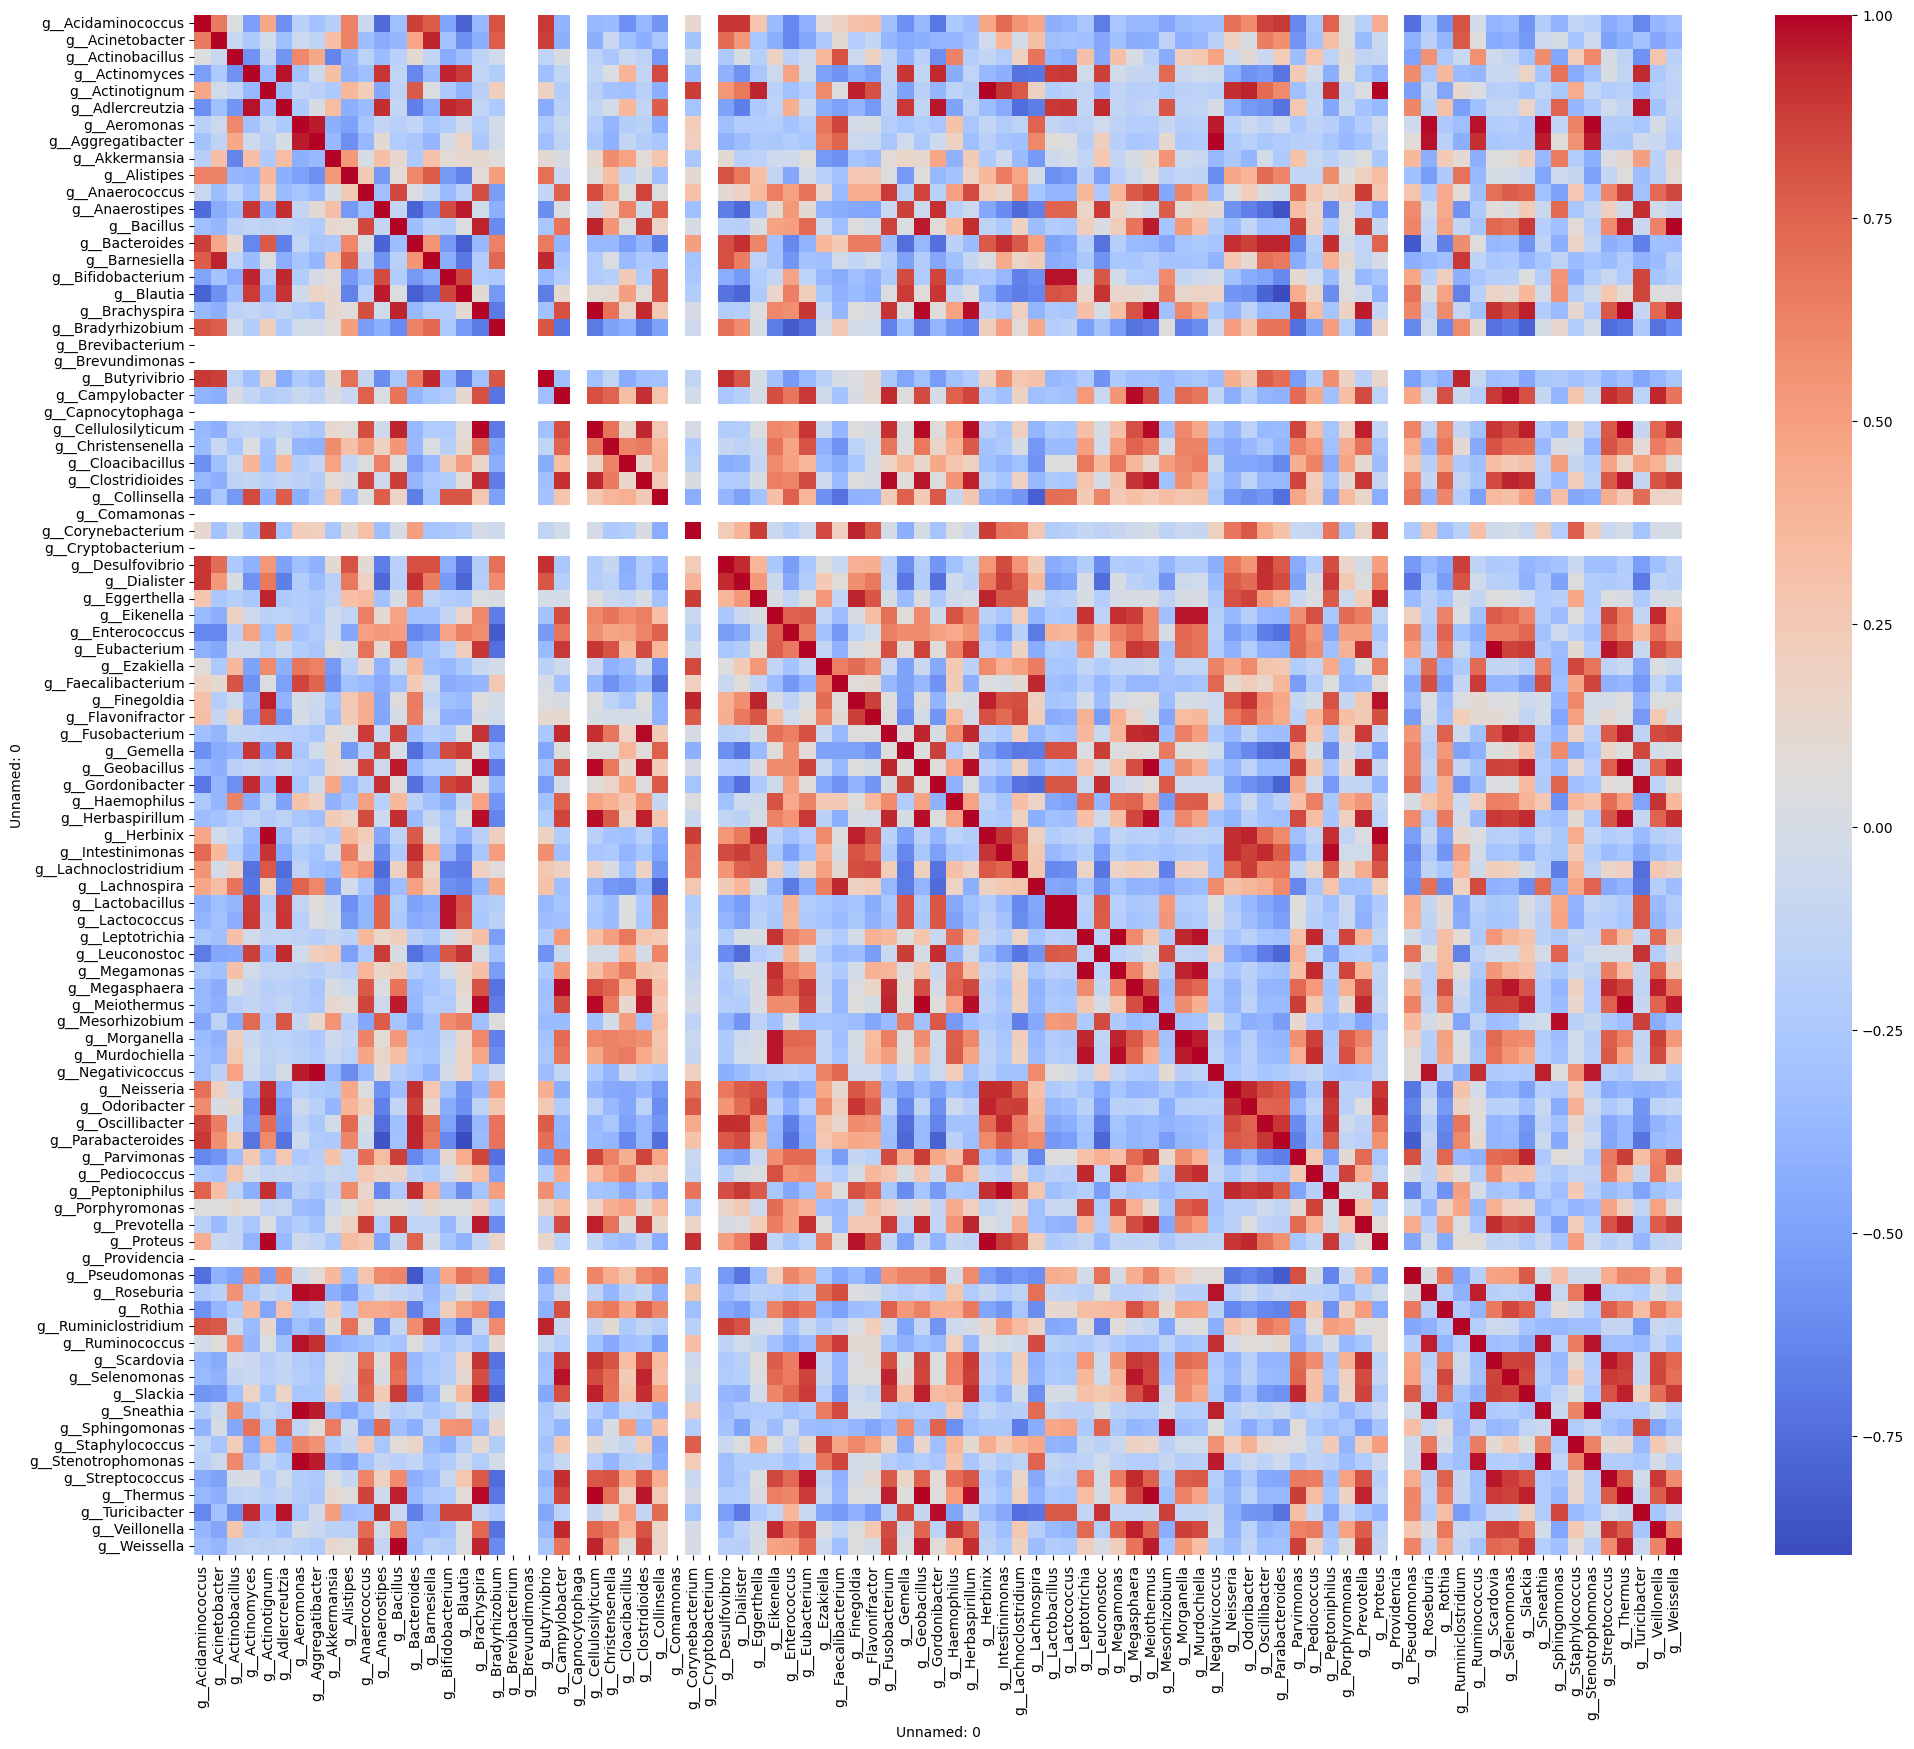

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12*2, 10*2)) # set the figure size
sns.heatmap(df1.corr(), cmap='coolwarm', ax=ax)

<Axes: >

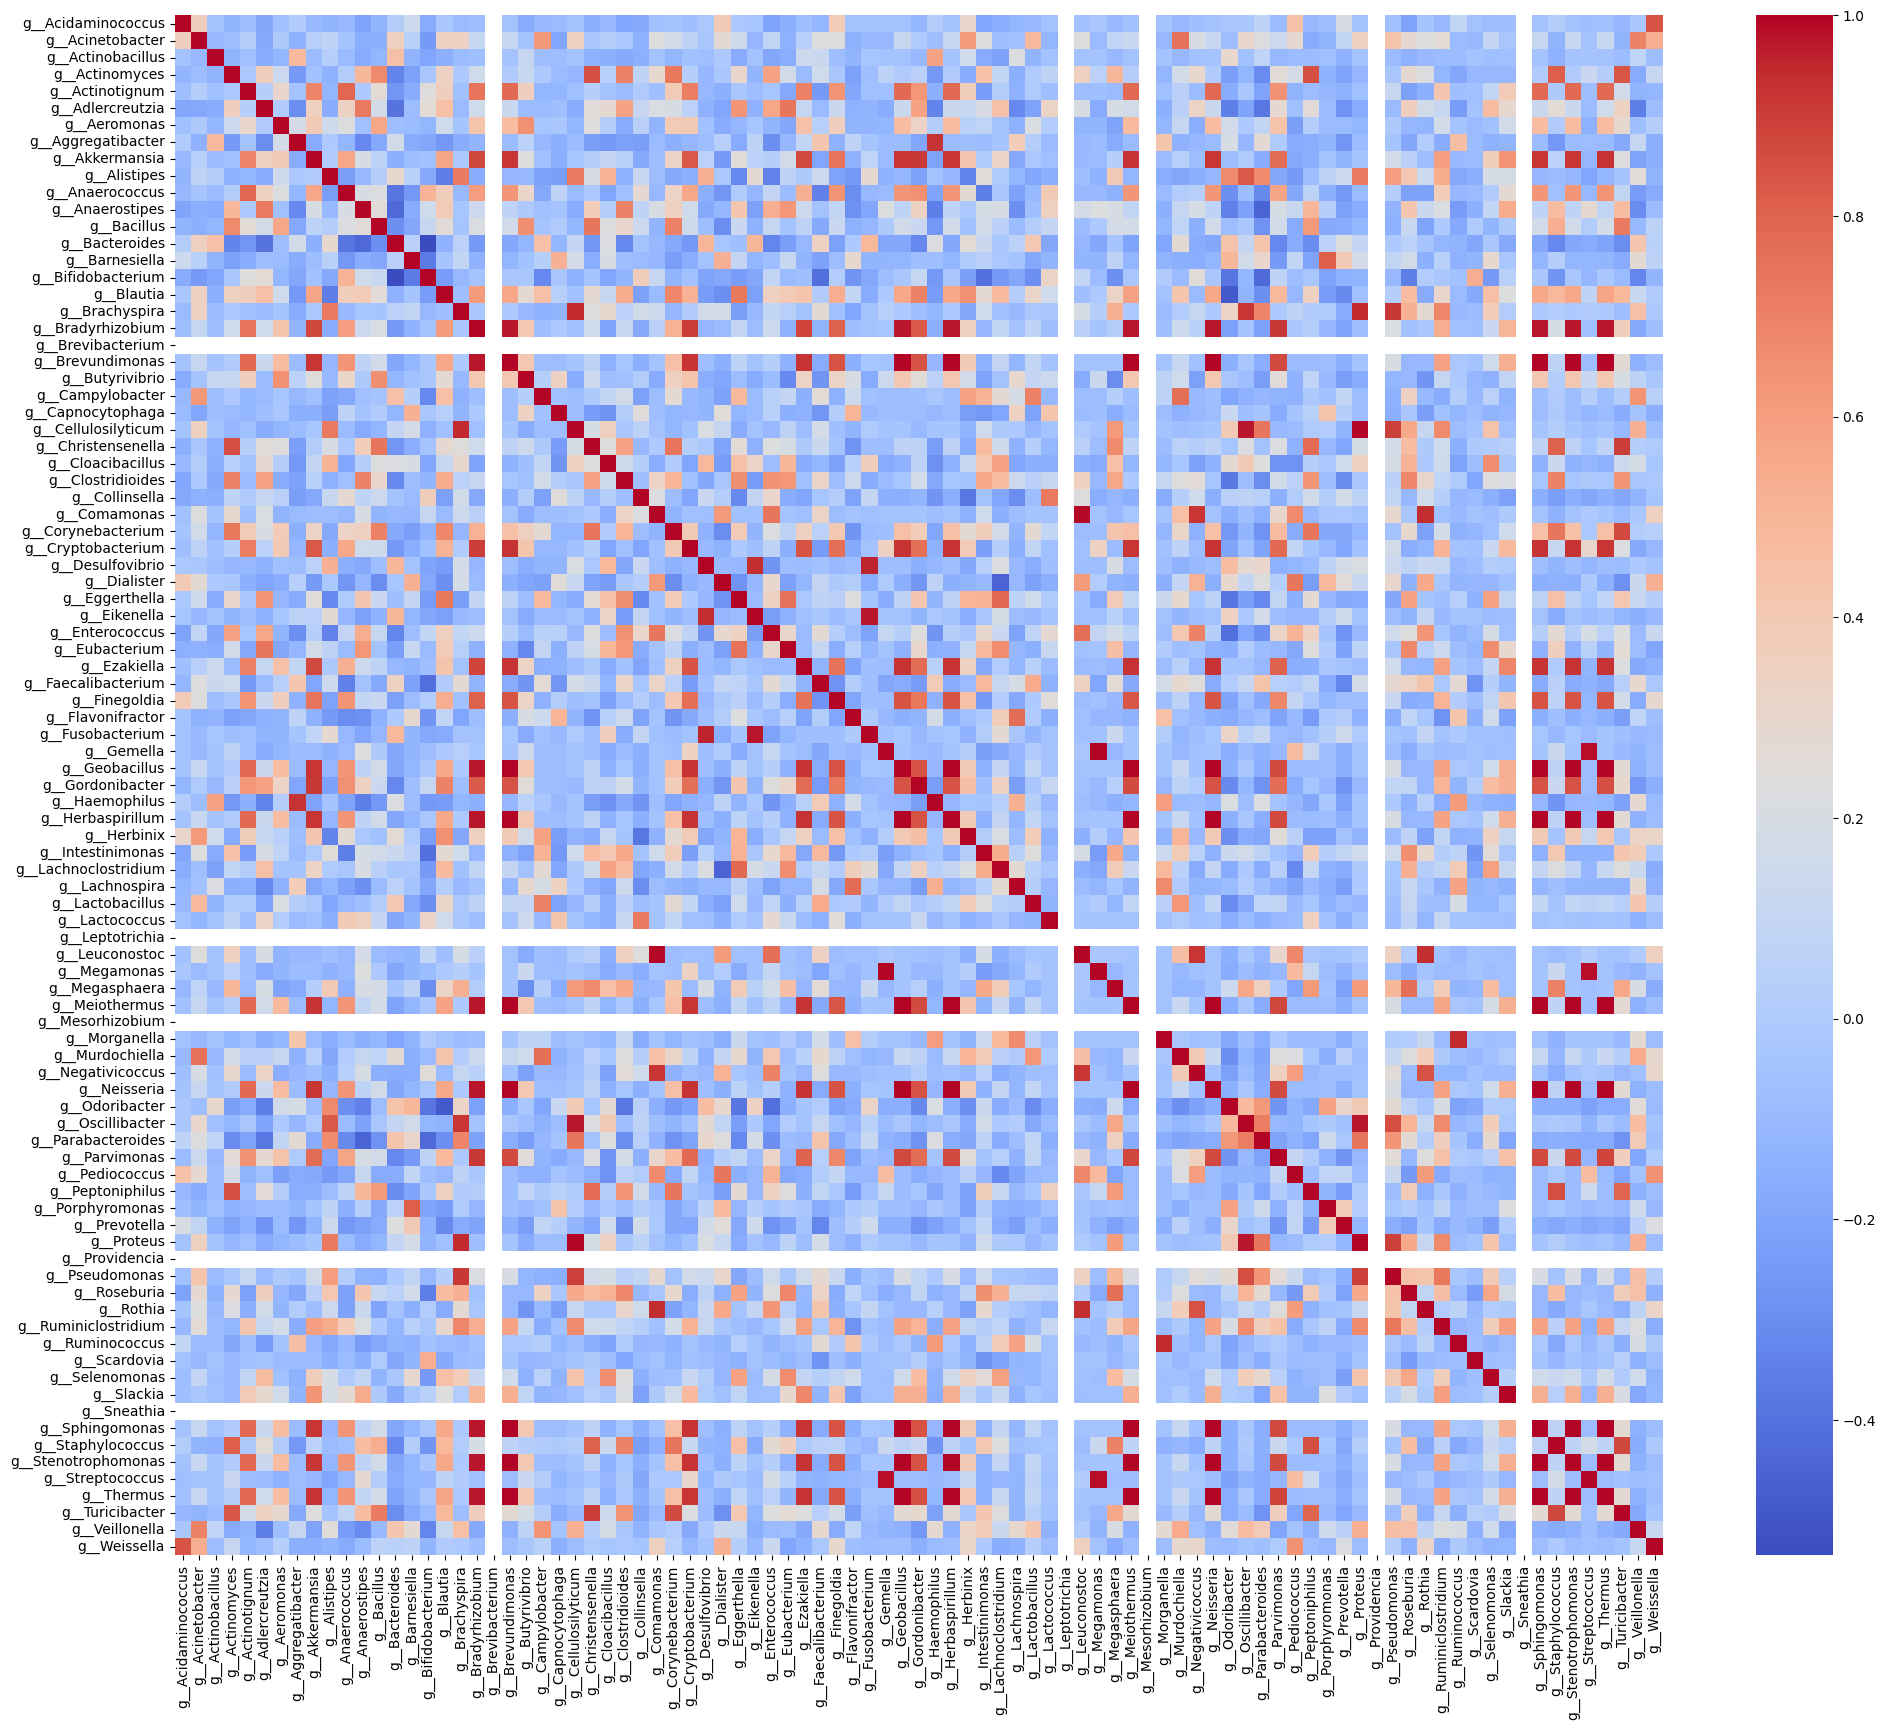

In [83]:
fig, ax = plt.subplots(figsize=(12*2, 10*2)) # set the figure size
sns.heatmap(df2.corr(), cmap='coolwarm', ax=ax)

In [78]:
import scprep
import seaborn as sns
imp_all = scprep.select.highly_variable_genes(imputed_ALL,percentile=80)
# heatmap labels
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

NameError: ignored

#**imputation mb-PHENIX in a UNsurpervised manner** just like sc-phenix

In [ ]:
umap_op = umap.UMAP(n_components=10, verbose=True,metric='cosine',n_epochs=500,min_dist=0.5,n_neighbors=200,random_state=1,)
data_umap_vis_unsuper = umap_op.fit_transform(complement_asvstable)

In [ ]:
imputed_ALL_unsuper =mbPHENIX(complement_asvstable, data_umap_vis_unsuper, t=5,decay=1,metric='euclidean',knn=10)

In [ ]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

#*Non-imputed data distribution by status clusters*





In [ ]:
complement_asvstable

In [ ]:
dataframe_noimp =  complement_asvstable.copy()


In [ ]:
dataframe_noimp

In [ ]:
dataframe_noimp.to_csv('TD2.csv')

In [ ]:
name_1 = 'Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Akkermansia'

In [ ]:
sample_data_1

In [ ]:
dataframe_noimp['status']= sample_data_1['status']

In [ ]:
dataframe_noimp.columns[50]

In [ ]:
dataframe_noimp

In [ ]:
#name_1="Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes"

In [ ]:
sns.displot(dataframe_noimp, x=name_1, hue="status", kind="kde", fill=True,height=8, aspect=1)

In [ ]:
imp_all = scprep.select.highly_variable_genes(complement_asvstable,percentile=80)
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

#*Unsupervised imputed data distribution by status clusters (UMAP non supervised) for mb-phenix* 

In [ ]:
imputed_ALL_unsuper

In [ ]:
dataframe_imp_super=  imputed_ALL_unsuper.copy()

In [ ]:
dataframe_imp_super['status']= sample_data_1['status']

In [ ]:
import scprep
#z_score=1
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

imp_dataframe_imp_super = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)
ax = sns.clustermap(imp_dataframe_imp_super.iloc[:,:],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(20, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

In [ ]:
b= sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=False,height=8, aspect=1)
#b.set(xlim=(0.005, 37))

In [ ]:
b= sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=False)
#b.set(xlim=())

MAGIC

In [ ]:
import magic
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(complement_asvstable)

In [ ]:
dataframe_imp_MAGIC=  X_magic.copy()
dataframe_imp_MAGIC['status']= sample_data_1['status']

In [ ]:
import scprep
#z_score=1
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

imp_all = scprep.select.highly_variable_genes(X_magic,percentile=80)
ax = sns.clustermap(imp_all.iloc[:,:],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(20, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

In [ ]:
X_magic

In [ ]:
name_1= "Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Akkermansia"
b= sns.displot(dataframe_imp_MAGIC, x=name_1, hue="status", kind="kde", fill=True,log_scale=False,height=8, aspect=1)
#b.set(xlim=())

#*Superviced imputed data distribution by status clusters*

In [ ]:
imputed_ALL

In [ ]:
dataframe_imp_super=  imputed_ALL.copy()
dataframe_imp_super['status']= sample_data_1['status']

In [ ]:
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,height=8, aspect=1)
a.set(xlim=(2000, 9000))

In [ ]:
#name_1="Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia"
#import seaborn as sns
#a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=1)
#a.set(xlim=(2000, 9000))

In [ ]:
name_1="Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Anaerovibrio"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=1)
a.set(yticklabels=[])

a.set(xlim=(2000, 9000))

In [ ]:
name_1="Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Anaerostipes"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=1)
a.set(yticklabels=[])

In [ ]:
name_1="Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Escherichia.Shigella"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=1)
a.set(xticklabels=[])
a.set(yticklabels=[])


In [ ]:
name_1= "Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Romboutsia"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
name_1= "Bacteria;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Enterococcus"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
name_1 = "Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
name_1 = "Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae_UCG.005"
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
name_1 = "Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae_UCG.003"
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
name_1 = "Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae_UCG.005"
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
name_1 = "Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Roseburia"
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
!pip install scprep
import scprep
x=scprep.stats.differential_expression_by_cluster(dataframe_imp_super.iloc[:,:-1], sample_data_4umap, measure='emd', direction='both', gene_names=None, n_jobs=-2)

In [ ]:
#clasesdic={"healthy":0,"IFG":1,"IGT":2,"IFG+IGT":3,"T2D":4,"T2D_treated":5}
emd = pd.DataFrame([       x[0]['emd'].rename('healthy'),      x[1]['emd'].rename('IFG'),
               x[2]['emd'].rename('IGT')  , x[3]['emd'].rename('IFG+IG') ,
                 x[4]['emd'].rename('T2D') ,  x[5]['emd'].rename('T2D_treated')])

In [ ]:
c= pd.DataFrame()
#c['Akkermansia'] = emd['Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Akkermansia']

In [ ]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL,percentile=80)

In [ ]:
ax = sns.clustermap(imp_all.iloc[:,:],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=True,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(20, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

In [ ]:
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True)
a.set(xlim=(2000, 9000))

In [ ]:
name_1 = 'Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter'

dataframe_imp_super.columns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True)
a.set(xlim=(0.1, 6))

**Install dependencies for Heatmap**

In [ ]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL,percentile=80)

In [ ]:
#z_score=1
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

In [ ]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)

In [ ]:
#z_score=1
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

In [ ]:
#z_score=1

imp_all = scprep.select.highly_variable_genes(complement_asvstable,percentile=80)
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

##**Try Different target_ weight values**

In [ ]:
target_weight= 0.9


umap_op = umap.UMAP(n_components=10, verbose=True,metric='cosine',n_epochs=10000,min_dist=0.1,
                    n_neighbors=200,random_state=1,target_weight=target_weight)
data_umap_vis_super = umap_op.fit_transform(complement_asvstable,sample_data_4umap)

In [ ]:
imputed_ALL_unsuper =mbPHENIX(complement_asvstable, data_umap_vis_super, t=5,decay=1,metric='euclidean',knn=10)

In [ ]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)

In [ ]:
#z_score=1
imp_all = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))